In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Load the datasets in dF
cst = pd.read_csv('olist_customers_dataset.csv')
loc = pd.read_csv('olist_geolocation_dataset.csv')
itm = pd.read_csv('olist_order_items_dataset.csv')
pay = pd.read_csv('olist_order_payments_dataset.csv')
rev = pd.read_csv('olist_order_reviews_dataset.csv')
prd = pd.read_csv('olist_products_dataset.csv')
ordr = pd.read_csv('olist_orders_dataset.csv')
sel = pd.read_csv('olist_sellers_dataset.csv')
tsl = pd.read_csv('product_category_name_translation.csv')

### II. Harmonized dF with merge operations

In [2]:
# List of all dF
a = [cst, loc, itm, pay, rev, prd, ordr, sel]

In [3]:
# Check unique value and shape of both dF to...
print('REVIEW dF | Key unique value:', len(rev['order_id'].unique()),
      '| Shape:', rev.shape)
print('ORDER  dF | Key unique value:', len(ordr['order_id'].unique()),
      '| Shape:', ordr.shape)

# Merge
b = rev.merge(ordr, on='order_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:', len(b['order_id'].unique()),
      '| Shape:', b.shape)

print('\n', b['_merge'].value_counts())
b.drop(columns='_merge', inplace=True)

REVIEW dF | Key unique value: 99441 | Shape: (100000, 7)
ORDER  dF | Key unique value: 99441 | Shape: (99441, 8)

MERGED dF | Key unique value: 99441 | Shape: (100000, 15)

 both          100000
right_only         0
left_only          0
Name: _merge, dtype: int64


In [4]:
# Check unique value and shape of both dF to...
print('ITEM dF   | Key unique value:', len(itm['order_id'].unique()),
      '| Shape:', itm.shape)
print('PAY  dF   | Key unique value:', len(pay['order_id'].unique()),
      '| Shape:', pay.shape)

# Merge
c = itm.merge(pay, on='order_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:', len(c['order_id'].unique()),
      '| Shape:', c.shape)

print('\n', c['_merge'].value_counts())
c.drop(columns='_merge', inplace=True)

ITEM dF   | Key unique value: 98666 | Shape: (112650, 7)
PAY  dF   | Key unique value: 99440 | Shape: (103886, 5)

MERGED dF | Key unique value: 98665 | Shape: (117601, 12)

 both          117601
right_only         0
left_only          0
Name: _merge, dtype: int64


In [5]:
# Check unique value and shape of both dF to...
print('c dF      | Key unique value:', len(c['order_id'].unique()), '| Shape:',
      c.shape)
print('b dF      | Key unique value:', len(b['order_id'].unique()), '| Shape:',
      b.shape)

# Merge
d = c.merge(b, on='order_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:', len(d['order_id'].unique()),
      '| Shape:', d.shape)

print('\n', d['_merge'].value_counts())
d.drop(columns='_merge', inplace=True)

c dF      | Key unique value: 98665 | Shape: (117601, 11)
b dF      | Key unique value: 99441 | Shape: (100000, 14)

MERGED dF | Key unique value: 98665 | Shape: (118315, 25)

 both          118315
right_only         0
left_only          0
Name: _merge, dtype: int64


In [6]:
# Check unique value and shape of both dF to...
print('d dF       | Key unique value:', len(d['product_id'].unique()),
      '| Shape:', d.shape)
print('PRODUCT dF | Key unique value:', len(prd['product_id'].unique()),
      '| Shape:', prd.shape)

# Merge
e = d.merge(prd, on='product_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF  | Key unique value:', len(e['order_id'].unique()),
      '| Shape:', e.shape)

print('\n', e['_merge'].value_counts())
e.drop(columns='_merge', inplace=True)

d dF       | Key unique value: 32951 | Shape: (118315, 24)
PRODUCT dF | Key unique value: 32951 | Shape: (32951, 9)

MERGED dF  | Key unique value: 98665 | Shape: (118315, 33)

 both          118315
right_only         0
left_only          0
Name: _merge, dtype: int64


In [7]:
# Check unique value and shape of both dF to...
print('e dF        | Key unique value:', len(e['customer_id'].unique()),
      '| Shape:', e.shape)
print('CUSTOMER dF | Key unique value:', len(cst['customer_id'].unique()),
      '| Shape:', cst.shape)

# Merge
f = e.merge(cst, on='customer_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF   | Key unique value:', len(f['customer_id'].unique()),
      '| Shape:', f.shape)

print('\n', f['_merge'].value_counts())
f.drop(columns='_merge', inplace=True)

e dF        | Key unique value: 98665 | Shape: (118315, 32)
CUSTOMER dF | Key unique value: 99441 | Shape: (99441, 5)

MERGED dF   | Key unique value: 98665 | Shape: (118315, 37)

 both          118315
right_only         0
left_only          0
Name: _merge, dtype: int64


In [8]:
# Check unique value and shape of both dF to...
print('f dF      | Key unique value:', len(f['seller_id'].unique()),
      '| Shape:', f.shape)
print('SELLER dF | Key unique value:', len(sel['seller_id'].unique()),
      '| Shape:', sel.shape)

# Merge
df_original = f.merge(sel, on='seller_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:', len(df_original['order_id'].unique()),
      '| Shape:', df_original.shape)

print('\n', df_original['_merge'].value_counts())
df_original.drop(columns='_merge', inplace=True)

f dF      | Key unique value: 3095 | Shape: (118315, 36)
SELLER dF | Key unique value: 3095 | Shape: (3095, 4)

MERGED dF | Key unique value: 98665 | Shape: (118315, 40)

 both          118315
right_only         0
left_only          0
Name: _merge, dtype: int64


### III. Cleaning

**III.1 Ordering dF by columns type**

In [9]:
# List of features organized by continue / discrete types
date_list = [
    'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp',
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

adress = ['customer_zip_code_prefix', 'seller_zip_code_prefix']

cat_to_dis = [
    'customer_city', 'customer_state', 'seller_city', 'seller_state',
    'payment_type', 'order_status', 'product_category_name'
]

id_list = [
    'order_id', 'product_id', 'seller_id', 'review_id', 'customer_id',
    'customer_unique_id', 'order_item_id'
]

In [10]:
# Concatenation to ordering dF
df = pd.concat(
    [
        df_original.loc[:, date_list],  # Date
        df_original.loc[:, adress],  # Adress
        df_original.loc[:, cat_to_dis],  # Categorical -> Discretize
        df_original.loc[:, id_list]  # Id
    ],
    axis=1)

df = pd.concat([df, df_original.drop(columns=df.columns)], axis=1)
df.drop(columns=['review_comment_title', 'review_comment_message'],
        inplace=True)

In [11]:
# Clean datas
df = df.dropna()
df

,shipping_limit_date,review_creation_date,review_answer_timestamp,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,seller_zip_code_prefix,customer_city,customer_state,seller_city,seller_state,payment_type,order_status,product_category_name,order_id,product_id,seller_id,review_id,customer_id,customer_unique_id,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,2017-09-19 09:45:35,2017-09-21 00:00:00,2017-09-22 10:57:03,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,28013,27277,campos dos goytacazes,RJ,volta redonda,SP,credit_card,delivered,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,97ca439bc427b48bc1cd7177abe71365,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,1,58.9,13.29,1,2,72.19,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,2017-07-05 02:44:11,2017-07-14 00:00:00,2017-07-17 12:50:07,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,75800,27277,jatai,GO,volta redonda,SP,boleto,delivered,cool_stuff,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,b11cba360bbe71410c291b764753d37f,e6eecc5a77de221464d1c4eaff0a9b64,0fb8e3eab2d3e79d92bb3fffbb97f188,1,55.9,17.96,1,1,73.86,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,2018-05-23 10:56:25,2018-06-05 00:00:00,2018-06-06 21:41:12,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,30720,27277,belo horizonte,MG,volta redonda,SP,credit_card,delivered,cool_stuff,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,af01c4017c5ab46df6cc810e069e654a,4ef55bf80f711b372afebcb7c715344a,3419052c8c6b45daf79c1e426f9e9bcb,1,64.9,18.33,1,2,83.23,4,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,2017-08-07 18:55:08,2017-08-10 00:00:00,2017-08-13 03:35:17,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,83070,27277,sao jose dos pinhais,PR,volta redonda,SP,credit_card,delivered,cool_stuff,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8304ff37d8b16b57086fa283fe0c44f8,30407a72ad8b3f4df4d15369126b20c9,e7c828d22c0682c1565252deefbe334d,1,58.9,16.17,1,3,75.07,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,2017-08-16 22:05:11,2017-08-25 00:00:00,2017-08-28 00:51:18,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,36400,27277,conselheiro lafaiete,MG,volta redonda,SP,credit_card,delivered,cool_stuff,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,426f43a82185969503fb3c86241a9535,91a792fef70ecd8cc69d3c7feb3d12da,0bb98ba72dcc08e95f9d8cc434e9a2cc,1,58.9,13.29,1,4,72.19,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,2017-04-27 05:10:28,2017-05-25 00:00:00,2017-05-26 11:42:36,2017-04-19 10:20:51,2017-04-21 05:10:28,2017-05-04 15:06:24,2017-05-24 10:52:43,2017-05-22 00:00:00,22793,80220,rio de janeiro,RJ,curitiba,PR,boleto,delivered,moveis_decoracao,fdaf98feac227eb978d8f33f36e0231d,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,fd48db39884359395ff6f18c8822aa7b,81ae83ce1a10af9f93fa3512bd9713b1,3d50a44231c2a153219cef76ee3e445d,1,119.9,16.14,1,1,136.04,4,44.0,533.0,2.0,1000.0,69.0,11.0,11.0
118311,2017-08-17 02:55:27,2017-08-18 00:00:00,2017-08-19 13:16:38,2017-08-11 10:15:22,2017-08-12 02:55:27,2017-08-14 22:03:19,2017-08-17 17:47:55,2017-09-04 00:00:00,13485,82620,lim

**III.2 Changing format to date**

In [12]:
# Change dtype to datetime
for i in df.iloc[:, :8]:
    df[i] = pd.to_datetime(df[i])
    df[i] = df[i].dt.date

df.iloc[:, :8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114073 entries, 0 to 118314
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   shipping_limit_date            114073 non-null  object
 1   review_creation_date           114073 non-null  object
 2   review_answer_timestamp        114073 non-null  object
 3   order_purchase_timestamp       114073 non-null  object
 4   order_approved_at              114073 non-null  object
 5   order_delivered_carrier_date   114073 non-null  object
 6   order_delivered_customer_date  114073 non-null  object
 7   order_estimated_delivery_date  114073 non-null  object
dtypes: object(8)
memory usage: 7.8+ MB


**III.3 Changing product category name**

In [13]:
for i, j in zip(tsl['product_category_name'],
                tsl['product_category_name_english']):
    df['product_category_name'].replace({i: j}, inplace=True)

# Category in english

### V. Feature engineering 

**V.1 Create Recency, Frequency, Amount Features**

In [14]:
# Transform categorical datas with one hot encoder
one_hot = pd.get_dummies(df['payment_type'])
df.drop(columns='payment_type', inplace=True)
df = pd.concat([df, one_hot], axis=1)

In [15]:
# Feature extracting the first command by customers
R_table = df[['customer_unique_id',
              'order_approved_at']].sort_values(by='order_approved_at')
R_table.drop_duplicates(subset='customer_unique_id', keep='last', inplace=True)

In [16]:
# Feature extracting the number of command by customers
F_table = df[['customer_unique_id',
              'order_approved_at']].sort_values(by='order_approved_at')

F_table = F_table.groupby(['customer_unique_id']).count()

In [17]:
import numpy as np

# Feature extracting payment type, number of loan and total amount spent on the website
df['price'] = df['price'] + df['freight_value']

M_table = pd.pivot_table(df,
                         values=['price'],
                         index=['customer_unique_id'],
                         aggfunc=np.sum)

In [18]:
# Concatenate F & M table
FM_table = pd.concat([F_table, M_table], axis=1)
FM_table['n_command'] = FM_table['order_approved_at']
FM_table.drop(columns='order_approved_at', inplace=True)

In [19]:
# Merge R & FM table
RFM_table = R_table.merge(FM_table, on='customer_unique_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:',
      len(RFM_table['customer_unique_id'].unique()), '| Shape:',
      RFM_table.shape)

print('\n', RFM_table['_merge'].value_counts())
RFM_table.drop(columns='_merge', inplace=True)
RFM_table.drop(columns='customer_unique_id', inplace=True)


MERGED dF | Key unique value: 92081 | Shape: (92081, 5)

 both          92081
right_only        0
left_only         0
Name: _merge, dtype: int64


In [20]:
RFM_table.head()

,order_approved_at,price,n_command
0,2016-10-04,92.27,1
1,2016-10-04,319.00,1
2,2016-10-04,18.62,1
3,2016-10-04,35.61,1
4,2016-10-04,101.44,2


**V.2 Ordering customer recency**

In [21]:
from datetime import timedelta

month = timedelta(days=30)
trim = timedelta(days=90)
half = timedelta(days=182)
year = timedelta(days=365)

new = np.where(
    R_table['order_approved_at'] > R_table['order_approved_at'].max() - month)

very_recent = np.where(
    R_table['order_approved_at'] > R_table['order_approved_at'].max() - trim)

recent = np.where(
    R_table['order_approved_at'] > R_table['order_approved_at'].max() - half)

old = np.where(
    R_table['order_approved_at'] > R_table['order_approved_at'].max() - year)

R_table['order_approved_at'] = 1

R_table['order_approved_at'].iloc[old] = 2

R_table['order_approved_at'].iloc[recent] = 3

R_table['order_approved_at'].iloc[very_recent] = 4

R_table['order_approved_at'].iloc[new] = 5

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**V.3 Other features**

In [22]:
encoded_features = pd.pivot_table(df,
                                  values=df.iloc[:, 36:],
                                  index=['customer_unique_id'],
                                  aggfunc=np.sum)

In [23]:
df.iloc[:, 36:]

,boleto,credit_card,debit_card,voucher
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
118310,1,0,0,0
118311,1,0,0,0
118312,1,0,0,0
118313,0,1,0,0


In [24]:
est_del = df['order_estimated_delivery_date']
real_del = df['order_delivered_customer_date']
app_del = df['order_approved_at']

# Feature to express time span between order and delivery
df['delivery_hours'] = (real_del - app_del).astype('timedelta64[h]')

df['delivery_hours']

0         168.0
1         336.0
2         408.0
3         192.0
4         336.0
          ...  
118310    792.0
118311    120.0
118312    456.0
118313    192.0
118314    192.0
Name: delivery_hours, Length: 114073, dtype: float64

In [25]:
from sklearn import preprocessing

# Feature to express delay in oder delivery
df['delay'] = est_del[est_del < real_del].isna()
df['delay'].replace(np.nan, 1, inplace=True)

# Label False to 0
le = preprocessing.LabelEncoder()
le.fit(df['delay'])
df['delay'] = le.transform(df['delay'])

# Invert 0 to 1 and 1 to 0
df['delay'].replace(1, 'a', inplace=True)
df['delay'].replace(0, 1, inplace=True)
df['delay'].replace('a', 0, inplace=True)

# 0 = No delay, 1 = Delay
df['delay'].head(6)

0    0
1    0
2    0
3    0
4    0
5    1
Name: delay, dtype: int64

In [26]:
delivery = pd.pivot_table(df,
                          values=['delivery_hours'],
                          index=['customer_unique_id'],
                          aggfunc=np.mean)

In [27]:
delay = pd.pivot_table(df,
                       values=['delay'],
                       index=['customer_unique_id'],
                       aggfunc=np.sum)

In [28]:
review = pd.pivot_table(df,
                        values=['review_score'],
                        index=['customer_unique_id'],
                        aggfunc=np.median)

In [29]:
payment = pd.pivot_table(df,
                         values=['payment_sequential', 'payment_installments'],
                         index=['customer_unique_id'],
                         aggfunc=np.mean)

In [30]:
items = pd.pivot_table(df,
                       values=['order_item_id'],
                       index=['customer_unique_id'],
                       aggfunc=np.median)

In [31]:
df['days_spent'] = app_del - app_del.min()

In [32]:
df['days_spent'] = df['days_spent'].dt.days.astype('int16')

In [33]:
days_spent = pd.pivot_table(df,
                            values=['days_spent'],
                            index=['customer_unique_id'],
                            aggfunc=np.mean).astype('int16')

In [34]:
df_stab_test = pd.concat(
    [FM_table, review, delivery, delay, encoded_features, payment, items, days_spent],
    axis=1).merge(R_table, on='customer_unique_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:',
      len(df_stab_test['customer_unique_id'].unique()), '| Shape:', df_stab_test.shape)

print('\n', df_stab_test['_merge'].value_counts())
df_stab_test.drop(columns='_merge', inplace=True)
df_stab_test.drop(columns='customer_unique_id', inplace=True)


MERGED dF | Key unique value: 92081 | Shape: (92081, 16)

 both          92081
right_only        0
left_only         0
Name: _merge, dtype: int64


In [35]:
df_stab_test[['price',
              'delivery_hours']] = df_stab_test[['price', 'delivery_hours'
                                                 ]].add(1).apply(np.log)
df_stab_test = df_stab_test.round(2)

# Delete infinite values
with pd.option_context('mode.use_inf_as_null', True):
    df_stab_test = df_stab_test.dropna()

## IX. Stability

In [36]:
%run B_Support.ipynb

# Sampling
df_stab_test = stratified_sample(df_stab_test, ['days_spent'],
                                 size=5000,
                                 keep_index=True)

<ipython-input-36-3f75882df3c6>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['size'] = 1


In [37]:
df_stab_test.iloc[:, 2:]

,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at
0,2,5.0,5.13,0,0,2,0,0,10.0,1.0,1.5,0,1
1,2,1.0,6.32,0,0,2,0,0,5.0,1.0,1.5,2,1
2,1,1.0,6.40,0,0,1,0,0,6.0,1.0,1.0,2,1
3,1,5.0,6.22,0,0,1,0,0,4.0,1.0,1.0,2,1
4,2,4.0,6.22,0,0,2,0,0,10.0,1.0,1.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5
4984,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5
4985,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5
4986,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5


In [38]:
# Scaling sample
df_stab_scaled = preprocessing.StandardScaler().fit_transform(
    df_stab_test.iloc[:, 1:].drop(columns=['days_spent']))

In [39]:
df_stab_scaled.shape

(4988, 13)

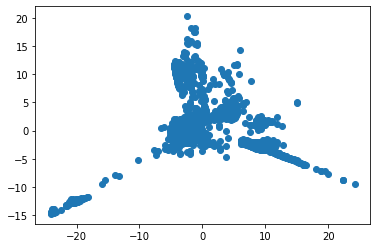

In [69]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

Iso = Isomap(n_components=2, n_neighbors=15).fit_transform(df_stab_scaled)

# Plot different Isomap results
plt.scatter(Iso[:, 0], Iso[:, 1])
plt.show()

In [70]:
from sklearn.cluster import KMeans

distortions = list()

K = range(1, 15)

for k in K:
    k_res = KMeans(n_clusters=k, init='k-means++')
    k_res.fit(Iso)
    distortions.append(k_res.inertia_)

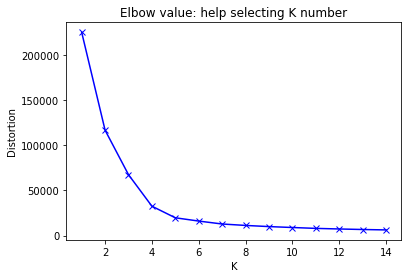

In [71]:
import matplotlib.pyplot as plt

plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow value: help selecting K number')

plt.show()

In [72]:
kmeans = KMeans(n_clusters=5).fit(Iso)
y_pred = kmeans.predict(Iso)

In [73]:
df_stab_test['cluster'] = y_pred
df_stab_test

,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
0,86923,4.63,2,5.0,5.13,0,0,2,0,0,10.0,1.0,1.5,0,1,2
1,16644,5.10,2,1.0,6.32,0,0,2,0,0,5.0,1.0,1.5,2,1,2
2,83735,4.91,1,1.0,6.40,0,0,1,0,0,6.0,1.0,1.0,2,1,0
3,61956,6.51,1,5.0,6.22,0,0,1,0,0,4.0,1.0,1.0,2,1,0
4,68347,4.70,2,4.0,6.22,0,0,2,0,0,10.0,1.0,1.5,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(358, 13)


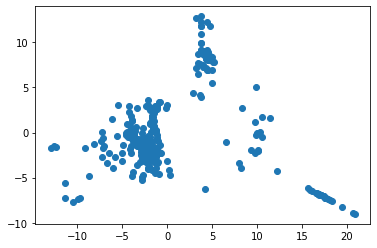

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(656, 13)


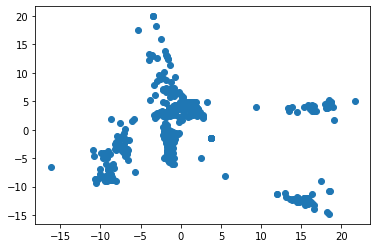

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(975, 13)


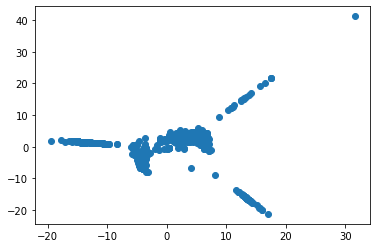

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1317, 13)


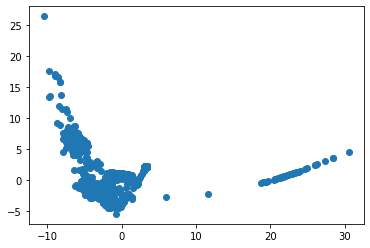

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1678, 13)


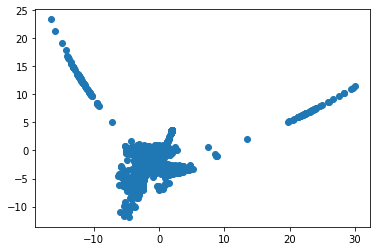

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(2025, 13)


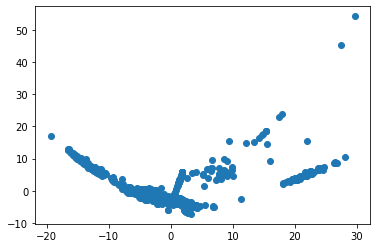

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(2391, 13)


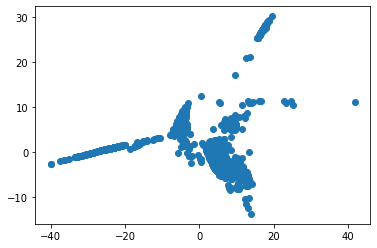

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(2746, 13)


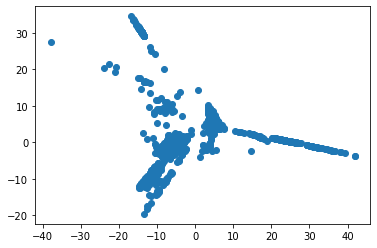

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(3011, 13)


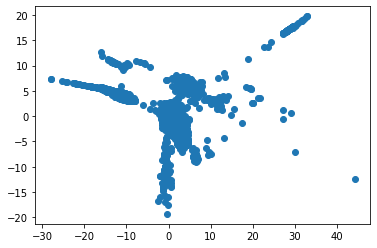

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(3401, 13)


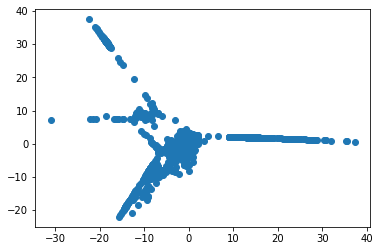

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(3626, 13)


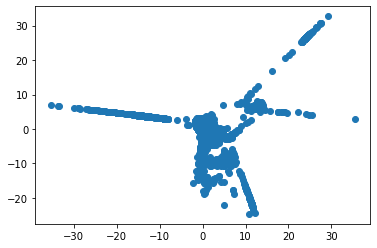

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(3845, 13)


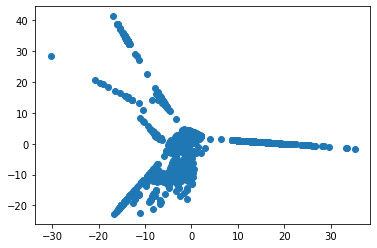

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4045, 13)


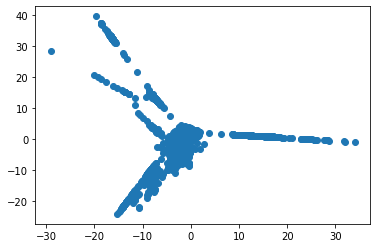

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4250, 13)


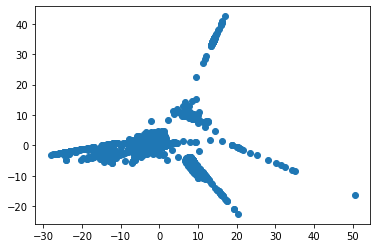

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4408, 13)


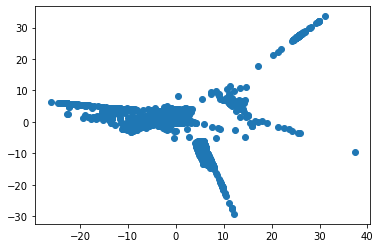

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4580, 13)


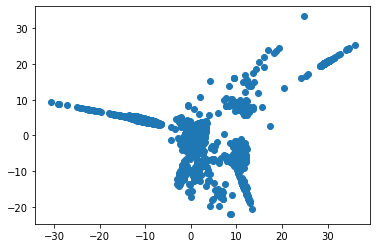

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4706, 13)


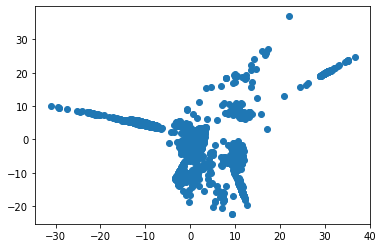

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4830, 13)


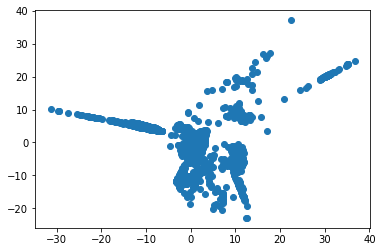

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4927, 13)


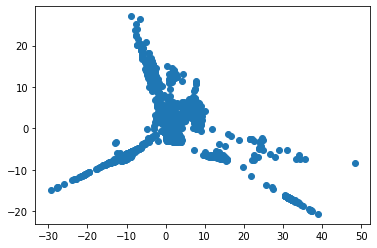

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4976, 13)


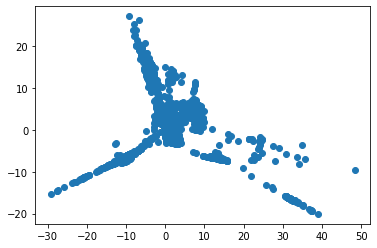

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4976, 13)


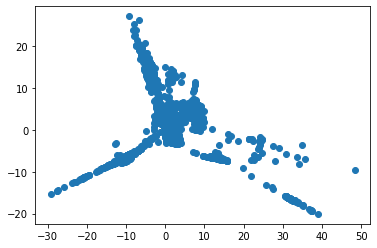

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4976, 13)


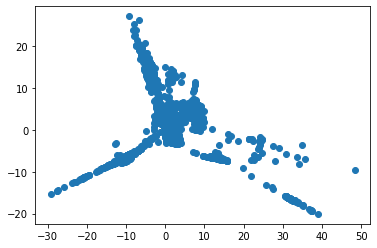

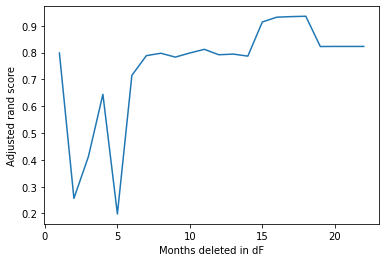

In [74]:
from sklearn.metrics import adjusted_rand_score

rand_score = list()

for i in range(1, 23):
    # Mask month by month the datas
    X = df_stab_test[df_stab_test['days_spent'] > (
        df_stab_test['days_spent'].max() - 30 * i)]

    y_ref = X['cluster']
    X.drop(columns=['days_spent', 'cluster'], inplace=True)
    
    # Scaling dF
    X_scaled = preprocessing.StandardScaler().fit_transform(X.iloc[:, 1:])
    print(X_scaled.shape)

    Iso = Isomap(n_components=2, n_neighbors=6).fit_transform(X_scaled)
    plt.scatter(Iso[:, 0], Iso[:, 1])
    plt.show()

    # Cluster and predict
    model = KMeans(n_clusters=4)
    y = model.fit_predict(Iso)

    # Rand_score calculation
    rand_score.append(adjusted_rand_score(y_ref, y))

In [77]:
for i in range(1, 23):
    # Mask month by month the datas
    X = df_stab_test[df_stab_test['days_spent'] > (
        df_stab_test['days_spent'].max() - 30 * i)]
    display(X)

,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
4630,1256,5.08,1,4.0,5.38,0,0,1,0,0,10.0,1.0,1.0,665,5,0
4631,843,4.95,1,4.0,5.13,0,1,0,0,0,1.0,1.0,1.0,665,5,1
4632,37405,3.06,1,5.0,3.22,0,1,0,0,0,1.0,1.0,1.0,665,5,1
4633,17194,4.16,1,5.0,5.26,0,0,0,1,0,1.0,1.0,1.0,665,5,3
4634,69312,5.30,2,1.0,5.75,2,0,2,0,0,2.0,1.0,1.5,665,5,2
4635,23798,4.62,1,3.0,5.26,0,0,1,0,0,2.0,1.0,1.0,665,5,0
4636,2282,4.28,1,3.0,4.98,0,1,0,0,0,1.0,1.0,1.0,665,5,1
4637,61458,4.94,1,1.0,4.57,0,1,0,0,0,1.0,1.0,1.0,665,5,1
4638,6332,4.95,1,5.0,5.13,0,1,0,0,0,1.0,1.0,1.0,665,5,1
4639,76114,5.38,1,4.0,5.38,0,0,1,0,0,2.0,1.0,1.0,665,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
4332,22764,4.28,1,5.0,5.38,0,0,1,0,0,3.0,1.0,1.0,635,4,0
4333,71427,3.88,1,5.0,5.48,0,0,1,0,0,1.0,1.0,1.0,635,4,0
4334,70067,3.83,1,1.0,5.67,0,0,1,0,0,1.0,1.0,1.0,635,4,0
4335,32850,4.39,1,5.0,4.80,0,0,1,0,0,7.0,1.0,1.0,635,4,0
4336,52754,4.99,1,5.0,5.67,0,0,1,0,0,2.0,1.0,1.0,635,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
4013,57498,5.01,1,5.0,5.48,0,0,1,0,0,3.0,1.0,1.0,605,4,0
4014,33449,4.21,1,4.0,6.18,0,0,1,0,0,1.0,1.0,1.0,605,4,0
4015,47144,5.91,2,2.0,5.67,0,0,2,0,0,1.0,1.0,1.5,605,4,2
4016,81137,4.86,3,4.0,5.48,0,0,3,0,0,1.0,1.0,1.0,605,4,0
4017,49733,5.13,1,5.0,5.26,0,0,1,0,0,3.0,1.0,1.0,605,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
3671,91444,4.61,1,5.0,6.18,0,1,0,0,0,1.0,1.0,1.0,575,3,1
3672,64063,4.33,1,5.0,6.32,0,0,1,0,0,1.0,1.0,1.0,575,3,0
3673,77204,4.03,1,5.0,4.98,0,0,1,0,0,1.0,1.0,1.0,575,3,0
3674,18589,5.10,1,5.0,4.57,0,0,1,0,0,1.0,1.0,1.0,575,3,0
3675,73649,4.93,2,4.0,6.22,2,0,2,0,0,1.0,1.0,1.5,575,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
3310,29483,3.83,1,5.0,5.26,0,0,1,0,0,1.0,1.0,1.0,545,3,0
3311,85734,5.32,1,4.0,5.13,0,0,1,0,0,1.0,1.0,1.0,545,3,0
3312,27456,5.29,1,5.0,5.89,0,0,1,0,0,5.0,1.0,1.0,545,3,0
3313,8659,6.25,1,5.0,5.13,0,0,1,0,0,8.0,1.0,1.0,545,3,0
3314,29186,4.39,1,5.0,3.89,0,0,1,0,0,2.0,1.0,1.0,545,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
2963,47429,3.90,1,5.0,4.57,0,1,0,0,0,1.0,1.0,1.0,515,3,1
2964,36471,3.39,1,1.0,7.48,1,0,1,0,0,1.0,1.0,1.0,515,3,4
2965,47119,5.08,1,5.0,6.22,0,0,1,0,0,10.0,1.0,1.0,515,3,0
2966,29819,4.63,1,1.0,7.01,1,1,0,0,0,1.0,1.0,1.0,515,3,1
2967,84314,4.03,1,5.0,5.82,0,0,1,0,0,5.0,1.0,1.0,515,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
2597,31359,4.50,1,4.0,4.80,0,0,1,0,0,3.0,1.0,1.0,485,2,0
2598,69857,3.66,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,485,2,0
2599,89170,5.04,1,5.0,4.80,0,0,1,0,0,5.0,1.0,1.0,485,2,0
2600,88965,6.13,1,5.0,6.44,0,0,1,0,0,7.0,1.0,1.0,485,2,0
2601,8382,4.59,1,5.0,5.26,0,0,1,0,0,1.0,1.0,1.0,485,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
2242,55535,4.63,2,1.0,6.48,0,0,2,0,0,3.0,1.0,1.5,455,2,2
2243,65386,5.69,1,5.0,5.82,0,0,1,0,0,5.0,1.0,1.0,455,2,0
2244,43003,3.83,1,5.0,5.38,0,0,1,0,0,4.0,1.0,1.0,455,2,0
2245,41700,3.64,1,2.0,6.51,0,0,1,0,0,1.0,1.0,1.0,455,2,0
2246,47661,4.67,1,4.0,5.26,0,0,1,0,0,1.0,1.0,1.0,455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
1977,48078,5.11,1,2.0,4.57,0,0,1,0,0,6.0,1.0,1.0,425,2,0
1978,14129,4.98,1,3.0,5.89,0,0,1,0,0,7.0,1.0,1.0,425,2,0
1979,6297,5.14,1,4.0,6.36,0,0,1,0,0,4.0,1.0,1.0,425,2,0
1980,54164,5.46,1,5.0,5.26,0,0,1,0,0,8.0,1.0,1.0,425,2,0
1981,46936,3.84,1,1.0,6.79,1,0,1,0,0,1.0,1.0,1.0,425,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
1587,42767,7.30,1,5.0,5.82,0,0,1,0,0,10.0,1.0,1.0,395,2,0
1588,41728,6.57,1,5.0,5.75,0,0,1,0,0,2.0,1.0,1.0,395,2,0
1589,61944,4.36,1,4.0,5.82,0,0,1,0,0,7.0,1.0,1.0,395,2,0
1590,49175,3.78,1,5.0,6.36,0,0,1,0,0,4.0,1.0,1.0,395,2,0
1591,74368,5.73,1,4.0,5.48,0,0,1,0,0,6.0,1.0,1.0,395,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
1362,41877,4.89,1,5.0,5.89,0,0,1,0,0,2.0,1.0,1.0,365,2,0
1363,71692,5.37,4,5.0,5.95,0,0,2,0,2,1.5,1.5,1.5,365,2,0
1364,34249,5.67,3,5.0,5.64,0,0,3,0,0,2.0,1.0,1.0,365,2,4
1365,8871,4.35,1,4.0,5.82,0,0,1,0,0,4.0,1.0,1.0,365,2,0
1366,44301,3.26,1,5.0,4.98,0,0,1,0,0,1.0,1.0,1.0,365,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
1143,29915,3.98,1,5.0,3.89,0,0,1,0,0,1.0,1.0,1.0,335,2,0
1144,33809,5.50,1,2.0,6.99,1,0,1,0,0,2.0,1.0,1.0,335,2,4
1145,36308,4.24,1,5.0,5.26,0,0,1,0,0,6.0,1.0,1.0,335,2,0
1146,42754,4.89,1,5.0,5.82,0,0,1,0,0,10.0,1.0,1.0,335,2,0
1147,23637,5.27,1,1.0,5.13,0,0,1,0,0,8.0,1.0,1.0,335,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
943,1061,4.88,2,5.0,5.38,0,0,2,0,0,3.0,1.0,1.5,305,1,2
944,44592,5.05,2,5.0,4.98,0,2,0,0,0,1.0,1.0,1.5,305,1,1
945,35436,4.06,1,5.0,6.18,0,1,0,0,0,1.0,1.0,1.0,305,1,1
946,84753,4.25,1,5.0,4.98,0,1,0,0,0,1.0,1.0,1.0,305,1,1
947,863,5.19,1,1.0,6.12,0,0,1,0,0,5.0,1.0,1.0,305,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
738,90564,4.76,1,5.0,6.07,0,0,1,0,0,4.0,1.0,1.0,275,1,0
739,13531,5.91,1,5.0,5.89,0,0,1,0,0,10.0,1.0,1.0,275,1,0
740,2910,5.23,1,5.0,6.22,0,0,1,0,0,3.0,1.0,1.0,275,1,0
741,43510,6.58,3,4.0,5.34,0,0,3,0,0,6.0,1.0,1.0,275,1,0
742,65466,5.08,1,1.0,7.29,1,0,1,0,0,6.0,1.0,1.0,275,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
580,40694,3.82,1,5.0,6.27,0,0,1,0,0,4.0,1.0,1.0,245,1,0
581,75095,3.71,1,4.0,5.75,0,1,0,0,0,1.0,1.0,1.0,245,1,1
582,31784,3.08,1,5.0,3.89,0,0,1,0,0,2.0,1.0,1.0,245,1,0
583,45593,3.46,1,4.0,5.26,0,0,1,0,0,1.0,1.0,1.0,245,1,0
584,76436,4.79,2,5.0,6.01,0,0,2,0,0,2.0,1.0,1.5,245,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
408,64065,4.01,1,5.0,5.58,0,0,1,0,0,1.0,1.0,1.0,215,1,0
409,3193,4.18,1,2.0,5.38,0,0,1,0,0,2.0,1.0,1.0,215,1,0
410,11268,4.28,1,5.0,5.58,0,0,1,0,0,2.0,1.0,1.0,215,1,0
411,60448,4.72,1,3.0,6.07,0,0,1,0,0,4.0,1.0,1.0,215,1,0
412,36136,3.79,1,4.0,5.67,0,0,1,0,0,2.0,1.0,1.0,215,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
282,1627,4.62,1,5.0,4.98,0,0,1,0,0,2.0,1.0,1.0,185,1,0
283,37065,5.17,2,5.0,5.75,0,0,1,0,1,1.0,1.5,1.0,185,1,0
284,81717,3.07,1,5.0,6.18,1,1,0,0,0,1.0,1.0,1.0,185,1,1
285,26353,4.82,2,1.0,5.58,0,0,2,0,0,2.0,1.0,1.5,185,1,2
286,51016,6.59,1,5.0,5.67,0,1,0,0,0,1.0,1.0,1.0,185,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
158,8621,4.40,1,1.0,5.38,0,1,0,0,0,1.0,1.0,1.0,155,1,1
159,52022,6.60,3,4.0,5.26,0,0,3,0,0,3.0,1.0,2.0,155,1,2
160,15778,4.92,1,4.0,5.75,0,0,1,0,0,1.0,1.0,1.0,155,1,0
161,71568,5.85,1,4.0,8.45,1,0,1,0,0,4.0,1.0,1.0,155,1,4
162,10371,5.11,1,5.0,5.89,0,1,0,0,0,1.0,1.0,1.0,156,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
61,51316,5.28,1,5.0,5.26,0,0,1,0,0,10.0,1.0,1.0,125,1,0
62,44498,4.91,1,5.0,5.26,0,0,1,0,0,2.0,1.0,1.0,125,1,0
63,29246,3.51,1,5.0,5.26,0,0,1,0,0,1.0,1.0,1.0,125,1,0
64,17164,6.34,1,4.0,4.98,0,0,1,0,0,4.0,1.0,1.0,126,1,0
65,5277,3.61,1,2.0,4.98,0,0,0,0,1,1.0,1.0,1.0,126,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
12,29728,3.07,1,5.0,5.38,0,1,0,0,0,1.0,1.0,1.0,95,1,1
13,59722,6.05,1,4.0,5.89,0,0,1,0,0,2.0,1.0,1.0,100,1,0
14,68961,4.45,1,5.0,6.44,0,0,1,0,0,6.0,1.0,1.0,101,1,0
15,5766,6.05,1,5.0,4.98,0,1,0,0,0,1.0,1.0,1.0,102,1,1
16,36787,4.66,1,5.0,5.89,0,0,1,0,0,10.0,1.0,1.0,104,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
12,29728,3.07,1,5.0,5.38,0,1,0,0,0,1.0,1.0,1.0,95,1,1
13,59722,6.05,1,4.0,5.89,0,0,1,0,0,2.0,1.0,1.0,100,1,0
14,68961,4.45,1,5.0,6.44,0,0,1,0,0,6.0,1.0,1.0,101,1,0
15,5766,6.05,1,5.0,4.98,0,1,0,0,0,1.0,1.0,1.0,102,1,1
16,36787,4.66,1,5.0,5.89,0,0,1,0,0,10.0,1.0,1.0,104,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


,index,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,days_spent,order_approved_at,cluster
12,29728,3.07,1,5.0,5.38,0,1,0,0,0,1.0,1.0,1.0,95,1,1
13,59722,6.05,1,4.0,5.89,0,0,1,0,0,2.0,1.0,1.0,100,1,0
14,68961,4.45,1,5.0,6.44,0,0,1,0,0,6.0,1.0,1.0,101,1,0
15,5766,6.05,1,5.0,4.98,0,1,0,0,0,1.0,1.0,1.0,102,1,1
16,36787,4.66,1,5.0,5.89,0,0,1,0,0,10.0,1.0,1.0,104,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,41577,4.55,1,5.0,4.29,0,0,1,0,0,6.0,1.0,1.0,692,5,0
4984,25526,3.56,1,3.0,3.22,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4985,37277,3.35,1,5.0,3.89,0,1,0,0,0,1.0,1.0,1.0,693,5,1
4986,47969,4.21,1,5.0,3.22,0,0,1,0,0,1.0,1.0,1.0,693,5,0


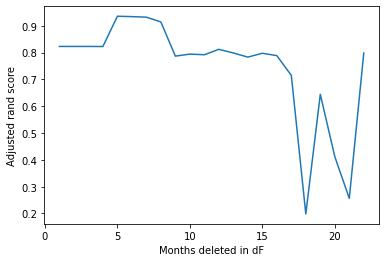

In [99]:
plt.plot(range(1, 23), rand_score)
plt.xlabel("Months deleted in dF")
plt.ylabel("Adjusted rand score")

plt.show()

In [98]:
rand_score

[0.8231092206516709,
 0.8231092206516709,
 0.8231092206516709,
 0.8227524354584558,
 0.9356966354184671,
 0.934313915910219,
 0.9321937032173955,
 0.9143164066319611,
 0.7869087212617247,
 0.794510919900834,
 0.7920734154650702,
 0.8122416499191035,
 0.798690274631025,
 0.7832555886820861,
 0.7976903625302132,
 0.7887742650550199,
 0.7152435643323358,
 0.19838179953540994,
 0.644414551759351,
 0.4121961465342297,
 0.25636941245779504,
 0.7985121673001424]